# 고혈압 분석 모델

고혈압 판단 조건
1. 'AS1_BPLIE2S_A' 누운 자세 - 2회 sys 측정 평균 140 이상
2. 'AS1_BPLIE2D_A',누운 자세 - 2회 dia 측정 평균 90 이상
3. 'AS1_DrugHtCu' 2번 응답

## @author: sh22h

- year0_NA를 DataFrame으로 불러오고 4개로 나눔
  - binary: 범주형(binary) 변수, 0 / 1 로 변경
  - categoryH0: 계층 없는 범주형(>3) 변수, one-hot-encoding
  - categoryH1: 계층 있는 범주형 변수, 표준화
  - ctn:연속형 변수, 정규화, 표준화 
  - y: 종속변수
    - 'AS1_BPLIE2S_A'
    - 'AS1_BPLIE2D_A'
    - 'AS1_DrugHtCu'
    - hyperTension: 고혈압

- 각각 정규화 또는 표준화한 후 변수는 X 고혈압은 y로 둠
  - 정규화(normalization): 0, 1
  - 표준화(standardization): 평균: 0 표준편차: 1
  - 계층화(quantile transform): 4분위 수

## 학습 모델

- 0차
  - 로컬에서 구현

- 1차
  - 2021-07-20
  - normalize_ctn
  - 
  ```
  model = Sequential()
  model.add(Dense(12, input_dim=52, activation='relu'))  # input layer requires input_dim param
  model.add(Dense(15, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))  # sigmoid instead of relu for final probability between 0 and 1
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
  scores = model.evaluate(X_test, y_test)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
  ```

- 2차
  - 2021-07-26
  - Decision Tree 구현

- 3차
  - 2021-08-02
  - one-hot encoding 구현

- 4차
  - 2021-08-07
  - 전처리 개선
  - Keras Tunor 사용 준비
  - P1 ~ P4 모델 구현

- 5차
  - 2021-08-08
  - 데이터 결측값 관리
    - TOTALC 유의미한 값: 15개
    - 키, 몸무게 결측값 매우 많음
  - 데이터 결측값 제거
    - TOTALC 삭제
    - KNNImputer로 결측값 채우기
    - https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer

- 6차
  - 2021-08-12
  - 데이터 결측값 관리
    - 변수 모두 포함하라!
    - 범주형: 최빈값
    - 수치형: 평균값(kNN)
    - TOTALC 포함하라
    - 주말까지
  - DicisionTree 보는 법을 해석하라.
  - 모델 정확도 올리기

- 7차
  - 2021-08-23
  - unit 통일
  - dropout 통일
  - 모델 정확도 여전히 안좋음

- 8차
  - 2021-08-24
  - unit, dropout 다시 분리
  - 레이어 늘림

- 9차
  - 2021-08-26
  - 변수 중요도 낮은 변수 일부 제거하고 모델 돌려보기
    - 영향을 조금이라도 주는 것
      1. 'AS1_AGE'
      2. 'AS1_WEIGHT'
      3. 'AS1_B18'
      4. 'AS1_SEX'
      5. 'P3'
      6. 'AS1_B01'
      7. 'AS1_B04'
    - 나머지, 영향 없음.

- 10차
  - 2021-08-29
  - unit 통일
  - dropout 통일
 
- 11차
  - 2021-08-30
  - max_epoch = 10으로 통일

- 12차
  - 데이터셋 변경

- 13차
  - 2021-09-09
  - 데이터셋 변경
    - P1 ~ P4 -> FA1 ~ FA5 
    - columns 54

- 14차
  - 2021-09-13
  - 데이터 추가
    - AS1_WAIST3_A
    - 허리둘레
    - 계층있는 연속형
    - columns: 55

- 15차
  - 2021-09-26
  - 누락 되었던 식품군 F1 ~ F17 데이터 추가
  - 모델 제작에는 사용하지 않음

- 16차
  - 2021-10-01
  - JOBB 추가
  - 키 대신에 BMI 넣음
  - FA를 DP로 변경

- 17차
  - 2022-05-04
  - _1000 변수만으로 모델 학습

- 18차
  - 2022-05-13
  - 혈압을 예측하는 회귀모델 구현
  - _1000 변수 + 원래 쓰던거
  - 77777 to 0
    - AS1_DRDUA: 77777 to 0
    - AS1_HVSMAM: 77777 to 0

  - 그냥 삭제

- 19차
  - 2022-06-01
  - 데이터 describe
    - AS1_B01 있, 1000kcal 나눔
    - AS1_B01 있, 안 나눔
    - AS1_B01 없, 1000kcal 나눔
    - AS1_B01 없, 안 나눔
  
  - 유전적 요인 분석하기
    - 아빠: Father
    - 엄마: Mather
    - 형제자매: Sibling

- 20차
  - 2022-09-17
  - data sampling
  - fn 너무 높음...

- 21차
  - 2022-09-19
  - 샘플링을 하자
  - 샘플링 절차
  1. train test split
  2. train만 샘플링
    1. UnderSampling
    2. OverSampling
  3. 모델 학습
  4. 테스트

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip freeze

In [ ]:
import sys
sys.version

'3.7.14 (default, Sep  8 2022, 00:06:44) \n[GCC 7.5.0]'

## dataset 불러오기 and 분리
- train, test

In [4]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HyperTension_Returns/Scaled_X_220709.csv', index_col=0)
# X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HyperTension_Returns/X_220706.csv', index_col=0)
raw_y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HyperTension_Returns/y_220706.csv', index_col=0)

In [10]:
pd.set_option('display.max_columns', None)
X

,AS1_SEX,AS1_STRPHYSJ,AS1_TIED,AS1_SLPAMSF,AS1_DRINK_2.0,AS1_DRINK_3.0,AS1_SMOKEA_1.0,AS1_SMOKEA_2.0,AS1_SMOKEA_3.0,AS1_EDUA,AS1_INCOME,AS1_DRDUA,AS1_PHYSTB,AS1_PHYSIT,AS1_PHYACTL,AS1_PHYACTM,AS1_PHYACTH,AS1_HEALTH,AS1_AGE,AS1_HVSMAM,AS1_HVSMDU,AS1_TOTALC,AS1_SLPAMTM,AS1_RGMEALFQA,AS1_HEIGHT,AS1_WEIGHT,AS1_BMI,AS1_WAIST3_A,DP1,DP2,DP3,DP4,DP5,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,AS1_B01,AS1_B02_1000,AS1_B03_1000,AS1_B04_1000,AS1_B05_1000,AS1_B06_1000,AS1_B07_1000,AS1_B08_1000,AS1_B09_1000,AS1_B10_1000,AS1_B11_1000,AS1_B12_1000,AS1_B13_1000,AS1_B14_1000,AS1_B15_1000,AS1_B16_1000,AS1_B17_1000,AS1_B18_1000,AS1_B19_1000,AS1_B20_1000,AS1_B21_1000,AS1_B23_1000,AS1_B24_1000,AS1_B02,AS1_B03,AS1_B04,AS1_B05,AS1_B06,AS1_B07,AS1_B08,AS1_B09,AS1_B10,AS1_B11,AS1_B12,AS1_B13,AS1_B14,AS1_B15,AS1_B16,AS1_B17,AS1_B18,AS1_B19,AS1_B20,AS1_B21,AS1_B23,AS1_B24,AS1_FMHTREL1A_1.0,AS1_FMHTREL1A_2.0,AS1_FMHTREL1A_3.0,AS1_FMHTREL1A_4.0,AS1_FMDMREL1A_1.0,AS1_FMDMREL1A_2.0,AS1_FMDMREL1A_3.0,AS1_FMDMREL1A_4.0,AS1_FMHEREL1A_1.0,AS1_FMHEREL1A_2.0,AS1_FMHEREL1A_3.0,AS1_FMHEREL1A_4.0,AS1_FMCVAREL1A_1.0,AS1_FMCVAREL1A_2.0,AS1_FMCVAREL1A_3.0,AS1_FMCVAREL1A_4.0,AS1_FMCVBREL1A_1.0,AS1_FMCVBREL1A_2.0,AS1_FMCVBREL1A_3.0,AS1_FMCVBREL1A_4.0,AS1_FMCDREL1A_1.0,AS1_FMCDREL1A_2.0,AS1_FMCDREL1A_3.0,AS1_FMCDREL1A_4.0,AS1_FMCHREL1A_1.0,AS1_FMCHREL1A_2.0,AS1_FMCHREL1A_3.0,AS1_FMCHREL1A_4.0,AS1_FMPVREL1A_1.0,AS1_FMPVREL1A_2.0,AS1_FMPVREL1A_3.0,AS1_FMLPREL1A_1.0,AS1_FMLPREL1A_2.0,AS1_FMLPREL1A_3.0
RID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EPI20_026_2_000004,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.563063,0.0,0.546046,0.592092,0.708709,0.805305,1.000000,0.838338,0.650651,0.000000,0.000000,0.0,0.573073,0.564064,0.236737,0.729229,0.935936,0.786286,0.858859,0.955956,0.474975,0.000000,0.266266,0.419419,0.850350,0.925926,0.0,0.913914,0.000000,0.000000,0.149650,0.000000,0.949950,0.944444,0.000000,0.565566,0.000000,0.983984,0.594595,0.000000,0.891210,0.253603,0.413343,0.682367,0.358456,0.153109,0.562967,0.524479,0.526738,0.135542,0.751251,0.352384,0.428210,0.873287,0.941945,0.327828,0.634634,0.633446,0.539314,0.183206,0.472472,0.609862,0.803616,0.760761,0.706707,0.923423,0.652653,0.703266,0.846346,0.831423,0.741742,0.393129,0.865866,0.491491,0.813814,0.930931,0.953954,0.635135,0.851852,0.790290,0.740490,0.544044,0.791792,0.828829,0.894394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EPI20_026_2_000006,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.436937,0.563063,0.0,0.000000,0.255255,1.000000,1.000000,0.719219,0.000000,0.188689,0.000000,0.000000,0.0,0.109610,0.068068,0.382382,0.762262,0.939439,0.440440,0.121622,0.730230,0.967486,0.899900,0.149930,0.114615,0.307307,0.922923,0.0,0.000000,0.882382,0.874875,0.742743,0.000000,0.771271,0.000000,0.881381,0.000000,0.000000,0.938438,0.742743,0.981481,0.686687,0.863160,0.951840,0.066062,0.741544,0.814823,0.890758,0.745155,0.823059,0.329906,0.941691,0.781878,0.707734,0.815838,0.753970,0.575576,0.670484,0.801798,0.782881,0.387019,0.625526,0.703338,0.833332,0.801802,0.897898,0.459459,0.762262,0.775776,0.846346,0.770270,0.824422,0.446758,0.865866,0.491491,0.726727,0.826326,0.737237,0.635135,0.725726,0.809309,0.797839,0.502002,0.704705,0.727728,0.827828,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EPI20_026_2_000007,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.0,0.546046,0.459960,1.000000,0.000000,0.000000,0.515015,0.650651,0.000000,0.000000,0.0,0.820320,0.564064,0.987487,0.869369,0.202640,0.572072,0.311311,0.671672,0.264765,0.606607,0.511011,0.419419,0.000000,0.742743,0.0,0.834835,0.534034,0.745245,0.380380,0.968969,0.724224,0.844344,0.000000,0.240741,0.741241,0.000000,0.000000,0.625626,0.330330,0.461563,0.182241,0.776822,0.457120,0.591268,0.710394,0

In [ ]:
# 모델 2 AS1_B01 없, 안 나눔
# X = X.drop(columns=['AS1_B01',
#                     'AS1_B02_1000', 'AS1_B03_1000', 'AS1_B04_1000',
#                     'AS1_B05_1000', 'AS1_B06_1000', 'AS1_B07_1000',
#                     'AS1_B08_1000', 'AS1_B09_1000', 'AS1_B10_1000',
#                     'AS1_B11_1000', 'AS1_B12_1000', 'AS1_B13_1000',
#                     'AS1_B14_1000', 'AS1_B15_1000', 'AS1_B16_1000',
#                     'AS1_B17_1000', 'AS1_B18_1000', 'AS1_B19_1000',
#                     'AS1_B20_1000', 'AS1_B21_1000', 'AS1_B23_1000',
#                     'AS1_B24_1000',
#                     ])

# 모델 4 AS1_B01 없, 1000kcal 나눔
X = X.drop(columns=['AS1_B01',
                    'AS1_B02', 'AS1_B03', 'AS1_B04',
                    'AS1_B05', 'AS1_B06', 'AS1_B07',
                    'AS1_B08', 'AS1_B09', 'AS1_B10',
                    'AS1_B11', 'AS1_B12', 'AS1_B13',
                    'AS1_B14', 'AS1_B15', 'AS1_B16',
                    'AS1_B17', 'AS1_B18', 'AS1_B19',
                    'AS1_B20', 'AS1_B21', 'AS1_B23',
                    'AS1_B24',
                    ])

# 모델 1 AS1_B01 있, 안 나눔
# X = X.drop(columns=['AS1_B02_1000', 'AS1_B03_1000', 'AS1_B04_1000',
#                     'AS1_B05_1000', 'AS1_B06_1000', 'AS1_B07_1000',
#                     'AS1_B08_1000', 'AS1_B09_1000', 'AS1_B10_1000',
#                     'AS1_B11_1000', 'AS1_B12_1000', 'AS1_B13_1000',
#                     'AS1_B14_1000', 'AS1_B15_1000', 'AS1_B16_1000',
#                     'AS1_B17_1000', 'AS1_B18_1000', 'AS1_B19_1000',
#                     'AS1_B20_1000', 'AS1_B21_1000', 'AS1_B23_1000',
#                     'AS1_B24_1000',
#                     ])

# 모델 3 영양소(nutrients) 변수 AS1_B01(에너지), 1000kcal 나눔 (보정)
# X = X.drop(columns=['AS1_B02', 'AS1_B03', 'AS1_B04',
#                     'AS1_B05', 'AS1_B06', 'AS1_B07',
#                     'AS1_B08', 'AS1_B09', 'AS1_B10',
#                     'AS1_B11', 'AS1_B12', 'AS1_B13',
#                     'AS1_B14', 'AS1_B15', 'AS1_B16',
#                     'AS1_B17', 'AS1_B18', 'AS1_B19',
#                     'AS1_B20', 'AS1_B21', 'AS1_B23',
#                     'AS1_B24',
#                     ])

X = X.drop(columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',
                    'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17'])

In [ ]:
# y = raw_y['AS1_DRUGHTCU_FILLNA']
# y = raw_y['AS1_BPLIE2S_A']
# y = raw_y['AS1_BPLIE2D_A']
y = raw_y['HYPERTENSION']

## Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=415)
# X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=415)
# X_train, X_test, y_train, y_test = train_test_split(X, raw_y, test_size=0.2, random_state=415)
# X_train = pd.concat([X_train[y_train == 1], X_train[y_train == 0].sample(n=1511, random_state=415)])
# y_train = pd.concat([y_train[y_train == 1], y_train[y_train == 0].sample(n=1511, random_state=415)])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6519, 89) (1630, 89) (6519,) (1630,)


In [ ]:
print(f"""샘플링 전:

전체 데이터 개수: {len(y)}
전체 데이터 pos: {(y == 1).sum()}
전체 데이터 neg: {(y == 0).sum()}

train 데이터 개수: {len(y_train)}
train 데이터 pos: {(y_train == 1).sum()}
train 데이터 neg: {(y_train == 0).sum()}

test 데이터 개수: {len(y_test)}
test 데이터 pos: {(y_test == 1).sum()}
test 데이터 neg: {(y_test == 0).sum()}
""")

샘플링 전:

전체 데이터 개수: 8149
전체 데이터 pos: 1883
전체 데이터 neg: 6266

train 데이터 개수: 6519
train 데이터 pos: 1511
train 데이터 neg: 5008

test 데이터 개수: 1630
test 데이터 pos: 372
test 데이터 neg: 1258



## sampling

OverSampling, UnderSampling

참고자료: https://ek-koh.github.io/data%20analysis/imbalanced/

- 언더 샘플링(Undersampling
  - 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트 수준으로 감소시키는 기법
  - ROS 사용
    - 설명: https://imbalanced-learn.org/stable/under_sampling.html

- 오버 샘플링(Oversampling)
  - 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식하여 학습에 충분한 데이터를 확보하는 기법
  - 오버 샘플링 방식이 일반적으로 언더 샘플링보다 예측 성능이 더 유리함
  - SMOTE 사용
    - 설명: https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn

### 테스트 결과

- UnderSampling
 -

- OverSampling
  - Training error: 0.316 
  - Accuracy: 0.684
  - sensitivity: 0.721 
  - specificity: 0.647

### 결론

1. 샘플링하지 않고 사용.
2. 편향된 데이터에 맞춘 딥러닝 모델 재설계

In [ ]:
from imblearn.under_sampling import NearMiss

# nm1 = NearMiss(version=3)

# # 클래스 불균형 처리를 해주는 imbalanced-learn를 호출
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=415)  # over

In [ ]:
X_sampled, y_sampled = smote.fit_resample(X_train, y_train)
# X_sampled, y_sampled = nm1.fit_resample(X_train, y_train)

print("샘플링 전:", (y == 0).sum(), (y == 1).sum())

print(f"""
전체 데이터 개수: {len(y)}
전체 데이터 pos: {(y == 1).sum()}
전체 데이터 neg: {(y == 0).sum()}

train 데이터 개수: {len(y_sampled)}
train 데이터 pos: {(y_sampled == 1).sum()}
train 데이터 neg: {(y_sampled == 0).sum()}

test 데이터 개수: {len(y_test)}
test 데이터 pos: {(y_test == 1).sum()}
test 데이터 neg: {(y_test == 0).sum()}
""")

샘플링 전: 6266 1883

전체 데이터 개수: 8149
전체 데이터 pos: 1883
전체 데이터 neg: 6266

train 데이터 개수: 10016
train 데이터 pos: 5008
train 데이터 neg: 5008

test 데이터 개수: 1630
test 데이터 pos: 372
test 데이터 neg: 1258



In [ ]:
X_train, y_train = X_sampled, y_sampled
print("샘플링 전:", (y == 0).sum(), (y == 1).sum())

print(f"""
전체 데이터 개수: {len(y)}
전체 데이터 pos: {(y == 1).sum()}
전체 데이터 neg: {(y == 0).sum()}

train 데이터 개수: {len(y_train)}
train 데이터 pos: {(y_train == 1).sum()}
train 데이터 neg: {(y_train == 0).sum()}

test 데이터 개수: {len(y_test)}
test 데이터 pos: {(y_test == 1).sum()}
test 데이터 neg: {(y_test == 0).sum()}
""")

샘플링 전: 6266 1883

전체 데이터 개수: 8149
전체 데이터 pos: 1883
전체 데이터 neg: 6266

train 데이터 개수: 10016
train 데이터 pos: 5008
train 데이터 neg: 5008

test 데이터 개수: 1630
test 데이터 pos: 372
test 데이터 neg: 1258



## Tuning

In [ ]:
import IPython

!pip install -U keras-tuner
import kerastuner as kt

In [ ]:
from kerastuner import HyperModel, Objective

class RegressionHyperModel(HyperModel):
  def __init__(self, input_shape):
    self.input_shape = input_shape

class ClearTrainingOutput(Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
# class ClearTrainingOutput(keras.callbacks.Callback):
#   def on_train_end(*args, **kwargs):
#     IPython.display.clear_output(wait = True)

# 검증 데이터 손실이 5회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
es = EarlyStopping(monitor='', mode='min', verbose=1, patience=5)

# 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

rc = Recall()

In [ ]:
def model_builder(hp):
  model = Sequential()
  # model.add(Dense(12, input_dim=61, activation='relu'))

  # # Tune the number of units in the first Dense layer
  # # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 4, max_value = 256, step = 4)

  model.add(
      Dense(units = hp_units, activation='relu'))

  model.add(Dropout(0.01))
  model.add(
      Dense(units = hp_units, activation='relu'))
  
  model.add(Dropout(0.01))      
  model.add(
      Dense(units = hp_units, activation='relu'))

  # model.add(Dropout(0.01))      
  # model.add(
  #     Dense(units = hp_units, activation='relu'))
  
  # model.add(Dropout(0.01))      
  # model.add(
  #     Dense(units = hp_units, activation='relu'))
  
  # model.add(Dropout(0.01))      
  # model.add(
  #     Dense(units = hp_units, activation='relu'))
  
  # model.add(Dropout(0.01))      
  # model.add(
  #     Dense(units = hp_units, activation='relu'))
  
  # model.add(Dropout(0.01))      
  # model.add(
  #     Dense(units = hp_units, activation='relu'))
        
  model.add(Dense(1, activation='sigmoid')) # 출력층

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss="binary_crossentropy",
                metrics = ['accuracy']
                # metrics = ['binary_accuracy']
                # metrics = ['binary_accuracy', rc])
                )
  # model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
  
  return model

In [ ]:
input_shape = (X_train.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

# tuner = kt.RandomSearch(model_builder,
#                     #  objective = 'val_accuracy',
#                      objective = Objective("val_sensitivity", direction="max"),
#                       # objective = 'Recall',
#                      max_epochs = 256,
#                      hyperband_iterations=128,
#                      directory = './',
#                      project_name = 'HyperTension_220919_16')

tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                    #  objective = Objective(rc, direction="max"),
                      # objective = 'Recall',
                     max_epochs = 256,
                     hyperband_iterations=128,
                     directory = './',
                     project_name = 'HyperTension_220919_18')

In [ ]:
tuner.search(X_train, y_train,
             validation_data = (X_test, y_test),
             epochs = 256,
             callbacks = [ClearTrainingOutput(), es])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

print(f"""The hyperparameter search is complete.
units: {best_hps.get('units')}
learning rate: {best_hps.get('learning_rate')}
""")

Trial 173 Complete [00h 00m 02s]
val_accuracy: 0.7110429406166077

Best val_accuracy So Far: 0.7822085618972778
Total elapsed time: 00h 07m 03s
The hyperparameter search is complete.
units: 124
learning rate: 0.01



In [ ]:
print(best_hps.values)

{'units': 124, 'learning_rate': 0.01, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 5, 'tuner/round': 0}


In [ ]:
model = tuner.get_best_models(num_models=1)[0]
# model = tuner.hypermodel.build(best_hps)
# model.fit(X_train, y_train, epochs=512, verbose=0, validation_split=0.2, callbacks=es)
model.build(input_shape=X.shape)
scores = model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7822


In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
model.summary()

accuracy: 78.22%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               11284     
                                                                 
 dropout (Dropout)           (None, 124)               0         
                                                                 
 dense_1 (Dense)             (None, 124)               15500     
                                                                 
 dropout_1 (Dropout)         (None, 124)               0         
                                                                 
 dense_2 (Dense)             (None, 124)               15500     
                                                                 
 dense_3 (Dense)             (None, 1)                 125       
                                                                 
Total params: 42,409
Trainable params: 

## DNN

In [ ]:
UNITS = 24
EPOCH = 128
DROPOUT = 0.05
LEARNINGRATE = 0.001

# 검증 데이터 손실이 3회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료(Early Stopping)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(UNITS, activation='relu'))  # input layer requires input_dim param

model.add(Dropout(DROPOUT))
model.add(Dense(UNITS, activation='relu'))

model.add(Dropout(DROPOUT))
model.add(Dense(UNITS, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  # sigmoid instead of relu for final probability between 0 and 1

model.compile(loss="binary_crossentropy",
              optimizer = Adam(learning_rate = LEARNINGRATE),
              metrics=[Recall()])

history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.2, callbacks=es)
scores = model.evaluate(X_test, y_test)

Epoch 15: early stopping
51/51 [==============================] - 0s 2ms/step - loss: 0.5664 - recall_3: 0.5161


## 민감도 특이도

2022-09-06 추가

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
y_pred_r = model.predict(X_test)
y_pred_r = np.reshape(y_pred_r, len(y_pred_r))
y_pred = np.where(y_pred_r <= 0.5, 0, 1)
(y_pred == 1).sum()

473

In [ ]:
cm = confusion_matrix(y_test, y_pred)
scores = {'tn': cm[0, 0], 'fp': cm[0, 1], 'fn': cm[1, 0], 'tp': cm[1, 1]}
# scores['tn'] -= 50
# scores['fp'] += 50
print(scores)
# print((scores['tp'] + scores['tn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp']))

{'tn': 977, 'fp': 281, 'fn': 180, 'tp': 192}


In [ ]:
print("Training error:", ((scores['fp'] + scores['fn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp']) * 100).round(3),
      "\nAccuracy:", ((scores['tp'] + scores['tn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp']) * 100).round(3),)
print('sensitivity:', (scores['tp'] / (scores['tp'] + scores['fn'])).round(3), # recall
      '\nspecificity:', (scores['tn'] / (scores['fp'] + scores['tn'])).round(3))
print("f1:", f1_score(y_test, y_pred).round(3))

Training error: 28.282 
Accuracy: 71.718
sensitivity: 0.516 
specificity: 0.777
f1: 0.454


## feature importance

## feature importance


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=10)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred_r = tree_model.predict(X_test)
y_pred_r = np.reshape(y_pred_r, len(y_pred_r))
y_pred = np.where((y_pred_r < 0.5), 0, 1)
(y_pred == 1).sum()

472

In [ ]:
cm = confusion_matrix(y_test, y_pred)
scores = {'tn': cm[0, 0], 'fp': cm[0, 1], 'fn': cm[1, 0], 'tp': cm[1, 1]}
print(scores)
print("Training error:", ((scores['fp'] + scores['fn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp'])*100).round(3),
      "\nACC:",((scores['tp'] + scores['tn']) / (scores['tn'] + scores['fp'] + scores['fn'] + scores['tp'])*100).round(3) )
print('sensitivity:', (scores['tp'] / (scores['tp'] + scores['fn'])).round(3), # recall
      '\nspecificity:', (scores['tn'] / (scores['fp'] + scores['tn'])).round(3))
print("f1:", f1_score(y_test, y_pred).round(3))

{'tn': 954, 'fp': 304, 'fn': 204, 'tp': 168}
Training error: 31.166 
ACC: 68.834
sensitivity: 0.452 
specificity: 0.758
f1: 0.398


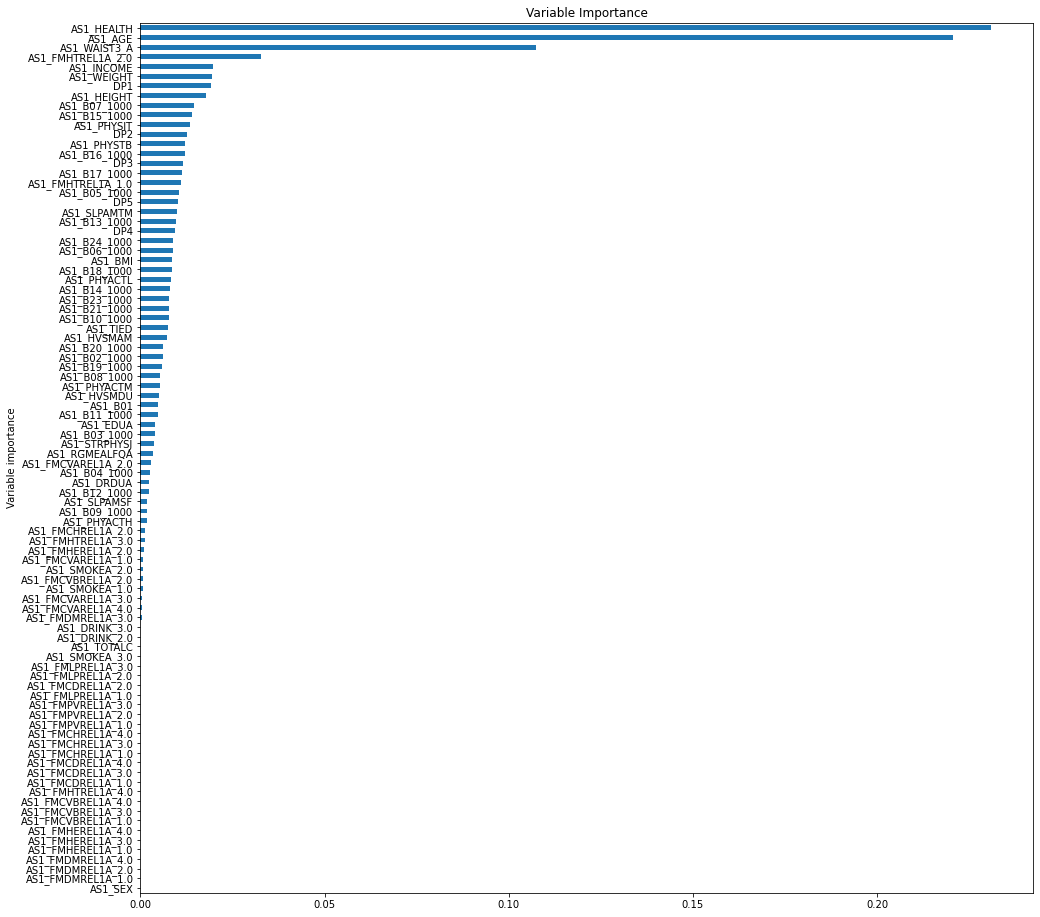

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
# tree_importances = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values()
tree_importances = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values()
tree_importances.plot(kind="barh", 
                      title="Variable Importance",
                      ylabel="Variable importance" ,ax=ax)
# ax.set_title("HyperTension feature importance with all variable")
# ax.set_ylabel("feature importance")

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# Define hyperparameters
params_xgb = {"max_depth": 5,
              "eta": 0.1,
              'objective': 'binary:logistic',
              'eval_metric':'logloss',
              'early_stopping': 32
              }

num_round = 400

In [ ]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(params=params_xgb, dtrain=dtrain, num_boost_round=num_round, evals=wlist)

[0]	train-logloss:0.655797	eval-logloss:0.657993
[1]	train-logloss:0.625202	eval-logloss:0.629215
[2]	train-logloss:0.599602	eval-logloss:0.60556
[3]	train-logloss:0.577548	eval-logloss:0.5858
[4]	train-logloss:0.558783	eval-logloss:0.569326
[5]	train-logloss:0.54279	eval-logloss:0.555244
[6]	train-logloss:0.528989	eval-logloss:0.543092
[7]	train-logloss:0.517137	eval-logloss:0.533108
[8]	train-logloss:0.50627	eval-logloss:0.525245
[9]	train-logloss:0.49717	eval-logloss:0.51813
[10]	train-logloss:0.488698	eval-logloss:0.511816
[11]	train-logloss:0.481177	eval-logloss:0.506475
[12]	train-logloss:0.474533	eval-logloss:0.502486
[13]	train-logloss:0.468363	eval-logloss:0.498906
[14]	train-logloss:0.463131	eval-logloss:0.495114
[15]	train-logloss:0.457597	eval-logloss:0.491801
[16]	train-logloss:0.452784	eval-logloss:0.489489
[17]	train-logloss:0.448929	eval-logloss:0.487052
[18]	train-logloss:0.444884	eval-logloss:0.485466
[19]	train-logloss:0.441575	eval-logloss:0.484147
[20]	train-loglos

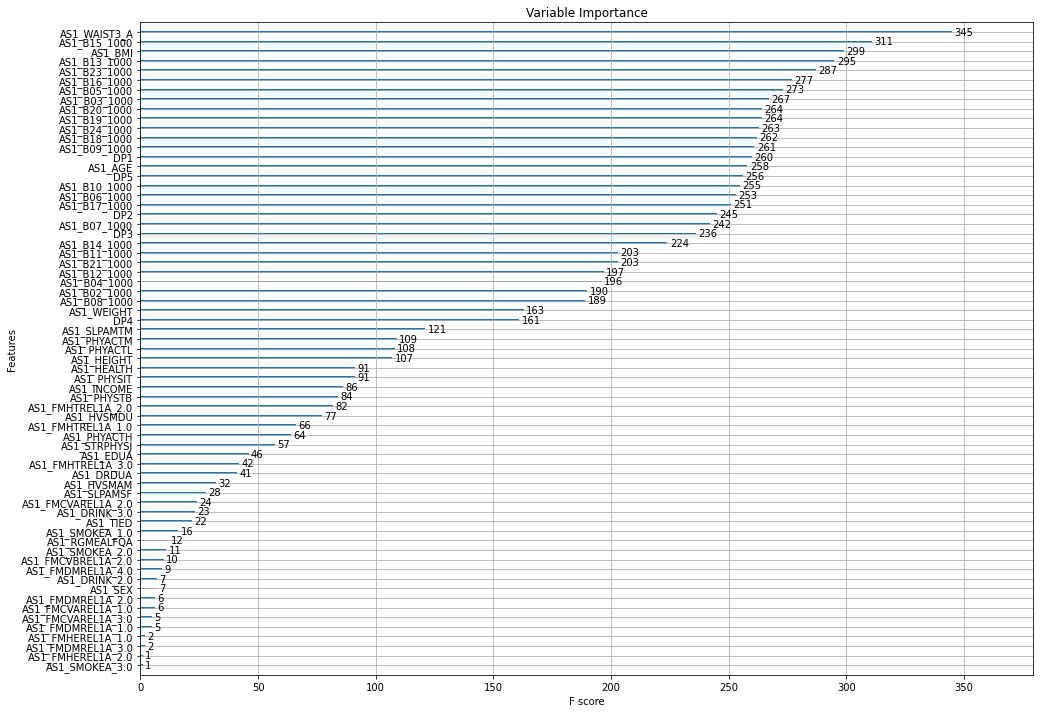

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))
plot_importance(xgb_model, title="Variable Importance", ax=ax)